In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
import os

In [27]:
data_path='CK+ DataSet/CK+48'

In [28]:
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


In [29]:
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-anger

Loaded the images of dataset-contempt

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-happy

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise



(981, 48, 48, 3)

In [5]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177
labels[366:440]=3 #75
labels[441:647]=4 #207
labels[648:731]=5 #84
labels[732:980]=6 #249

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [30]:
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)
x_test=X_test

In [29]:
input_shape=(48,48,3)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,3)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 conv2d_14 (Conv2D)          (None, 44, 44, 32)        9248      
                                                                 
 batch_normalization_14 (Bat  (None, 44, 44, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 22, 22, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 20, 20, 64)       

In [30]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

True

In [31]:
from keras import callbacks
filename='model_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [32]:
hist = model.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Epoch 1/50
119/119 [==============================] - 7s 39ms/step - loss: 2.5375 - accuracy: 0.3145 - val_loss: 3.1242 - val_accuracy: 0.0541
Epoch 2/50
119/119 [==============================] - 4s 35ms/step - loss: 1.8960 - accuracy: 0.4562 - val_loss: 2.9515 - val_accuracy: 0.0811
Epoch 3/50
119/119 [==============================] - 4s 37ms/step - loss: 1.4368 - accuracy: 0.5582 - val_loss: 1.8668 - val_accuracy: 0.3581
Epoch 4/50
119/119 [==============================] - 4s 36ms/step - loss: 1.2815 - accuracy: 0.6158 - val_loss: 1.3748 - val_accuracy: 0.5405
Epoch 5/50
119/119 [==============================] - 4s 37ms/step - loss: 1.1621 - accuracy: 0.6519 - val_loss: 1.6275 - val_accuracy: 0.5811
Epoch 6/50
119/119 [==============================] - 4s 36ms/step - loss: 0.9138 - accuracy: 0.7131 - val_loss: 1.3259 - val_accuracy: 0.6689
Epoch 7/50
119/119 [==============================] - 4s 36ms/step - loss: 0.8644 - accuracy: 0.7251 - val_loss: 1.5069 - val_accuracy: 0.4797

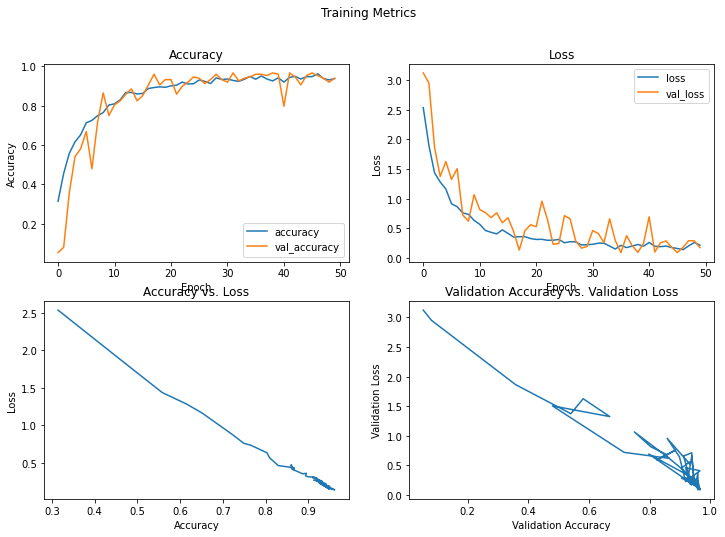

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('model_train_new.csv')

# Create subplots with two rows and two columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Training Metrics')

# Plot accuracy and val_accuracy
axs[0, 0].plot(data['epoch'], data['accuracy'], label='accuracy')
axs[0, 0].plot(data['epoch'], data['val_accuracy'], label='val_accuracy')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Plot loss and val_loss
axs[0, 1].plot(data['epoch'], data['loss'], label='loss')
axs[0, 1].plot(data['epoch'], data['val_loss'], label='val_loss')
axs[0, 1].set_title('Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plot accuracy vs. loss
axs[1, 0].plot(data['accuracy'], data['loss'])
axs[1, 0].set_title('Accuracy vs. Loss')
axs[1, 0].set_xlabel('Accuracy')
axs[1, 0].set_ylabel('Loss')

# Plot val_accuracy vs. val_loss
axs[1, 1].plot(data['val_accuracy'], data['val_loss'])
axs[1, 1].set_title('Validation Accuracy vs. Validation Loss')
axs[1, 1].set_xlabel('Validation Accuracy')
axs[1, 1].set_ylabel('Validation Loss')

plt.show()


In [50]:
score = model3.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.1723476648330688
Test accuracy: 0.9594594836235046


In [34]:
model.save('ck+dataset_with_my_model2_prediction.h5')

1/1 [==============================] - 0s 194ms/step


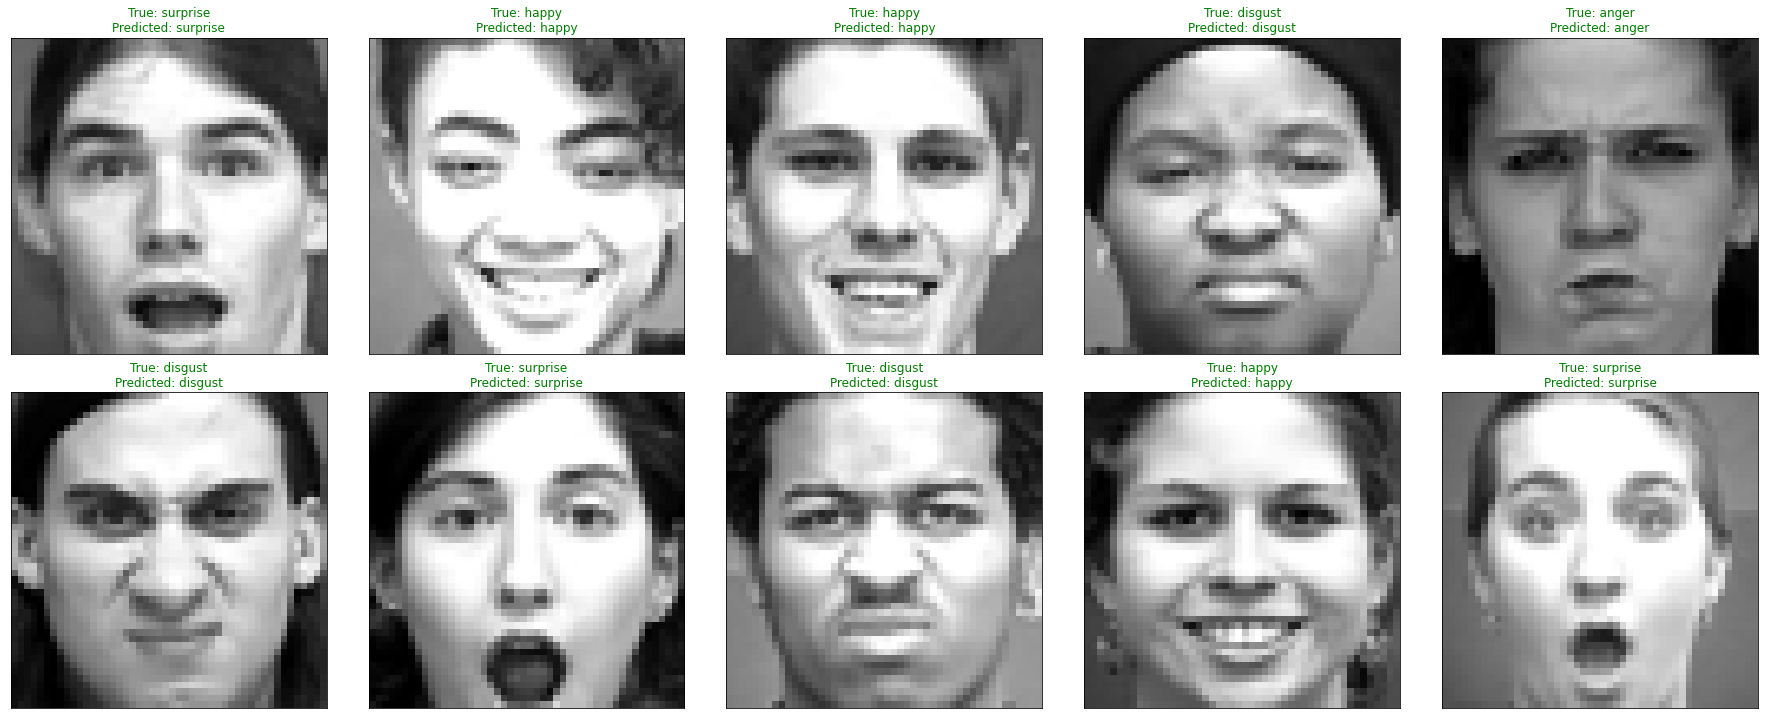

In [41]:
import random
import matplotlib.pyplot as plt

# Define a list of emotion classes
emotion_classes = ['anger','contempt','disgust','fear','happy','sadness','surprise']

# Generate 10 random indices from the test set
random_indices = random.sample(range(len(X_test)), 10)

# Make predictions on the random test images
predictions = model3.predict(X_test[random_indices])

# Plot the images with their true and predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Get the index of the current image
    index = random_indices[i]
    
    # Get the true label of the current image
    true_label = emotion_classes[np.argmax(y_test[index])]
    
    # Get the predicted label of the current image
    predicted_label = emotion_classes[np.argmax(predictions[i])]
    ax.imshow(X_test[index])
    if true_label == predicted_label:
          color = "green"
    else:
          color = "red"
            
    # Display the image and labels on the plot
    
    ax.set_title(f'True: {true_label}\nPredicted: {predicted_label}',color=color)
    
plt.tight_layout()
plt.show()

In [39]:
from tensorflow.keras.models import load_model

In [40]:
model3 = load_model('model1_ck+_dataset_crossentropy.h5')

In [45]:
import cv2
import numpy as np



# Load the cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start capturing video from webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Error: failed to capture image")
        break
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Draw rectangles around the faces and make predictions
    for (x, y, w, h) in faces:
        # Extract the face ROI
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = np.expand_dims(roi_gray, axis=2)
        roi_gray = np.repeat(roi_gray, 3, axis=2)
        roi_gray = np.expand_dims(roi_gray, axis=0)
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 3)) / 255.0
        # Make a prediction
        prediction = model3.predict(roi_gray)
        
        # Get the predicted emotion
        maxindex = int(np.argmax(prediction))
        emotion = emotion_classes[maxindex]

        # Draw the rectangle and predicted emotion text
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Display the resulting image
    cv2.imshow('Emotion Prediction', frame)
    
    # Exit the program when the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and destroy all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 34ms/step


In [7]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Convolution2D(filters=32,kernel_size=3 ,activation='relu', input_shape=[48, 48, 3]))
cnn.add(tf.keras.layers.Convolution2D(filters=64,kernel_size=3 ,activation='relu',padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Convolution2D(filters=128,kernel_size=5 ,activation='relu',padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Convolution2D(filters=512,kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Convolution2D(filters=512,kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten()) 
cnn.add(tf.keras.layers.Dense(256,activation = 'relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.25))
    
cnn.add(tf.keras.layers.Dense(512,activation = 'relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Dense(7, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       2

In [8]:
cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
cnn.get_config()
cnn.layers[0].get_config()
cnn.layers[0].input_shape
cnn.layers[0].output_shape
cnn.layers[0].get_weights()
np.shape(cnn.layers[0].get_weights()[0])
cnn.layers[0].trainable

True

In [9]:
from keras import callbacks
filename='model1_train_new.csv'
filepath="Best-weights-my_model1-{epoch:03d}-{loss:.4f}-{acc:.4f}.h5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [10]:
history = cnn.fit(X_train, y_train, batch_size=7, epochs=60, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Epoch 1/60
119/119 [==============================] - 17s 117ms/step - loss: 9.7540 - accuracy: 0.2089 - val_loss: 10.5874 - val_accuracy: 0.0473
Epoch 2/60
119/119 [==============================] - 14s 117ms/step - loss: 9.5274 - accuracy: 0.2317 - val_loss: 12.2949 - val_accuracy: 0.0473
Epoch 3/60
119/119 [==============================] - 14s 116ms/step - loss: 9.3531 - accuracy: 0.2761 - val_loss: 13.5740 - val_accuracy: 0.0541
Epoch 4/60
119/119 [==============================] - 14s 114ms/step - loss: 9.1538 - accuracy: 0.3265 - val_loss: 12.7967 - val_accuracy: 0.0473
Epoch 5/60
119/119 [==============================] - 13s 111ms/step - loss: 8.9994 - accuracy: 0.3529 - val_loss: 9.8607 - val_accuracy: 0.1757
Epoch 6/60
119/119 [==============================] - 14s 115ms/step - loss: 8.8443 - accuracy: 0.4022 - val_loss: 9.1654 - val_accuracy: 0.2230
Epoch 7/60
119/119 [==============================] - 14s 120ms/step - loss: 8.6990 - accuracy: 0.4262 - val_loss: 9.2374 - va

119/119 [==============================] - 14s 114ms/step - loss: 3.4226 - accuracy: 0.9388 - val_loss: 3.3281 - val_accuracy: 0.9730
Epoch 58/60
119/119 [==============================] - 14s 115ms/step - loss: 3.3922 - accuracy: 0.9304 - val_loss: 3.2309 - val_accuracy: 0.9595
Epoch 59/60
119/119 [==============================] - 14s 117ms/step - loss: 3.2799 - accuracy: 0.9376 - val_loss: 3.2474 - val_accuracy: 0.9662
Epoch 60/60
119/119 [==============================] - 14s 114ms/step - loss: 3.1475 - accuracy: 0.9448 - val_loss: 2.9774 - val_accuracy: 0.9797


In [11]:
cnn.save('model1_ck+_dataset_crossentropy.h5')

In [32]:
from tensorflow.keras.models import load_model
model4 = load_model('model1_ck+_dataset_crossentropy.h5')

5/5 [==============================] - 0s 53ms/step


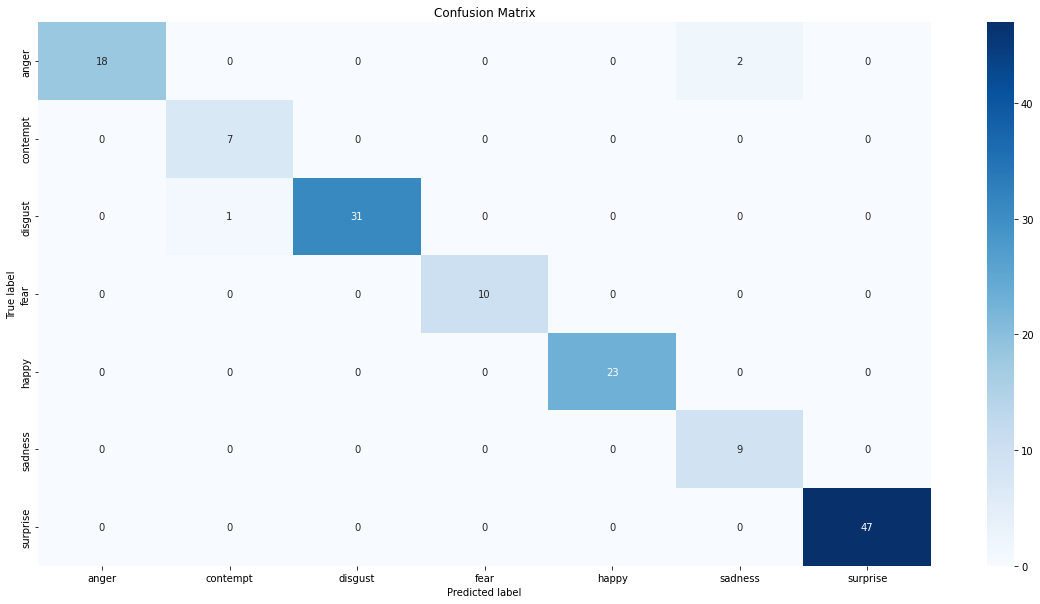

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test data
y_pred = np.argmax(model4.predict(X_test), axis=-1)

# Get the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='g', xticklabels=names, yticklabels=names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


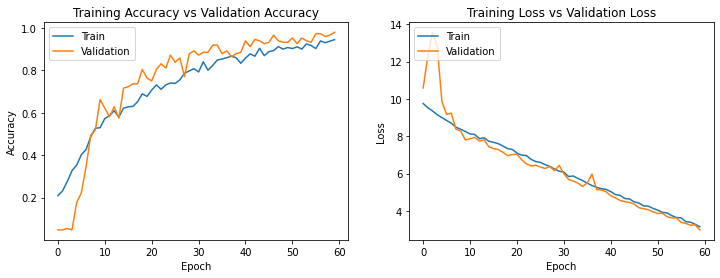

In [12]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test data
y_pred = model.predict_classes(X_test)

# Get the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='g', xticklabels=names, yticklabels=names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [18]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

def l2_multiclass_svm_loss(y_true, y_pred):
    """
    L2 SVM loss function for multiclass classification
    y_true: one-hot encoded true labels, shape=(batch_size, num_classes)
    y_pred: predicted scores, shape=(batch_size, num_classes)
    """
    # Set margin
    margin = 1.0
    
    # Get number of classes
    num_classes = K.int_shape(y_pred)[-1]
    
    # Get true scores
    true_scores = tf.reduce_sum(y_true * y_pred, axis=-1)
    
    # Compute maximum margins
    max_margins = K.maximum(0.0, y_pred - tf.expand_dims(true_scores, axis=-1) + margin)
    max_margins = max_margins - y_true * max_margins
    
    # Compute loss
    loss = K.sum(K.square(max_margins)) / 2.0
    
    return loss

model2 = Sequential()

model2.add(Convolution2D(filters=32, kernel_size=3, activation='relu', input_shape=[48, 48, 3]))
model2.add(Convolution2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=2, strides=2))
model2.add(Dropout(0.25))

model2.add(Convolution2D(filters=128, kernel_size=5, activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=2, strides=2))
model2.add(Dropout(0.25))

model2.add(Convolution2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=2, strides=2))
model2.add(Dropout(0.25))

model2.add(Convolution2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=2, strides=2))
model2.add(Dropout(0.25))

model2.add(Flatten()) 
model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Dense(7, activation='linear'))
model2.compile(loss=l2_multiclass_svm_loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 23, 23, 128)      

In [19]:
history1 = model2.fit(X_train, y_train, batch_size=7, epochs=60, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Epoch 1/60
119/119 [==============================] - 28s 132ms/step - loss: 93.4381 - accuracy: 0.1813 - val_loss: 72.4333 - val_accuracy: 0.1351
Epoch 2/60
119/119 [==============================] - 15s 122ms/step - loss: 74.3392 - accuracy: 0.2113 - val_loss: 211.3734 - val_accuracy: 0.0608
Epoch 3/60
119/119 [==============================] - 14s 118ms/step - loss: 62.1518 - accuracy: 0.2413 - val_loss: 687.8662 - val_accuracy: 0.0608
Epoch 4/60
119/119 [==============================] - 14s 116ms/step - loss: 60.4010 - accuracy: 0.2557 - val_loss: 1368.7332 - val_accuracy: 0.0608
Epoch 5/60
119/119 [==============================] - 15s 129ms/step - loss: 54.0568 - accuracy: 0.3145 - val_loss: 657.4580 - val_accuracy: 0.0946
Epoch 6/60
119/119 [==============================] - 19s 160ms/step - loss: 51.8213 - accuracy: 0.3313 - val_loss: 201.7484 - val_accuracy: 0.1689
Epoch 7/60
119/119 [==============================] - 17s 140ms/step - loss: 47.7219 - accuracy: 0.3505 - val_lo

KeyboardInterrupt: 

In [24]:
pandas.__version__

NameError: name 'pandas' is not defined

In [34]:
model2.save('model1_ck+_dataset_l2multiclassSVM.h5')

In [25]:
from tensorflow.keras.models import load_model
model3 = load_model('model1_ck+_dataset_l2multiclassSVM.h5')

ValueError: Unknown loss function: 'l2_multiclass_svm_loss'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

NameError: name 'history1' is not defined

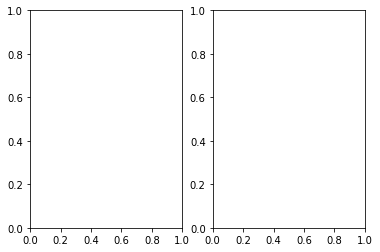

In [16]:
fig , ax = plt.subplots(1,2)
train_acc = history1.history['accuracy']
train_loss = history1.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history1.history['accuracy'])
ax[0].plot(history1.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history1.history['loss'])
ax[1].plot(history1.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()